In [2]:
import pandas as pd
import numpy as np

Import the cdc.csv file from github, I have cleaned some data.

In [3]:
cdc = pd.read_csv("/Users/zainabazizzaveri/Downloads/cdc.csv")

In [6]:
cdc1=cdc.drop(['Primary Mode','Etiology', 'Serotype or Genotype', 'Etiology Status','Setting','Hospitalizations'],axis=1)
cdc1 =cdc1.drop(['Info on Hospitalizations','Deaths','Info on Deaths','Food Contaminated Ingredient','IFSAC Category','Water Exposure','Water Type','Animal Type','Water Status','Animal Type Specify'],axis=1)
cdc1 = cdc1[cdc1.State !='Multistate']
cdc1
#cdc1["sequence item 0: expected str instance, float found"]

,Year,Month,State,Illnesses,Food Vehicle
0,2017,1,NY,20,"house salad; fish, baked flounder; broccoli, u..."
1,2017,1,WI,7,NaN
2,2017,1,TN,10,NaN
3,2017,1,OH,14,NaN
4,2017,1,WI,35,NaN
...,...,...,...,...,...
20843,1998,1,OH,4,"pizza, pepperoni"
20844,1998,1,CA,4,"stuffing, unspecified; sandwich, turkey"
20845,1998,1,PA,17,NaN
20846,1998,8,HI,38,"eggs, other"


In [7]:
cdc1 = cdc1.drop_duplicates(['Year','Month','State','Illnesses','Food Vehicle'],keep= 'last')
cdc1['str_year'] = cdc1['Year'].astype(str)
cdc1['str_month'] = cdc1['Month'].astype(str)
cdc1['conc'] = cdc1['str_year'] + cdc1['str_month'] + cdc1['State']
cdc1.loc[cdc1['conc']== '20164AZ']
cdc1['Illnesses'].astype(str)
cdc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 0 to 20853
Data columns (total 8 columns):
Year            19475 non-null int64
Month           19475 non-null int64
State           19475 non-null object
Illnesses       19475 non-null int64
Food Vehicle    10433 non-null object
str_year        19475 non-null object
str_month       19475 non-null object
conc            19475 non-null object
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [8]:
cdc1.loc[cdc1['conc']== '199810CA']

,Year,Month,State,Illnesses,Food Vehicle,str_year,str_month,conc
20206,1998,10,CA,64,NaN,1998,10,199810CA
20333,1998,10,CA,19,"chile relleno, unspecified",1998,10,199810CA
20338,1998,10,CA,4,"eggs, unspecified",1998,10,199810CA
20350,1998,10,CA,9,NaN,1998,10,199810CA
20359,1998,10,CA,15,turkey salad,1998,10,199810CA
20361,1998,10,CA,3,"tuna, unspecified",1998,10,199810CA
20363,1998,10,CA,39,NaN,1998,10,199810CA
20374,1998,10,CA,209,NaN,1998,10,199810CA


In [9]:
cdc2 = cdc1['Food Vehicle'].groupby([cdc1.conc]).apply(list).reset_index()
cdc3 = cdc1['Illnesses'].groupby([cdc1.conc]).apply(list).reset_index()

In [10]:
cdc4 = cdc2.merge(cdc3, left_on='conc', right_on='conc')
cdc4

,conc,Food Vehicle,Illnesses
0,199810CA,"[nan, chile relleno, unspecified, eggs, unspec...","[64, 19, 4, 9, 15, 3, 39, 209]"
1,199810CO,"[hollandaise sauce; fish, halibut; crab, unspe...",[14]
2,199810FL,"[gumbo, unspecified, chicken, unspecified, tor...","[5, 4, 30, 2, 2, 2, 4, 3, 2, 3, 7, 3, 2, 14, 2..."
3,199810HI,"[fish, mahi mahi, fish eggs, unspecified, fish...","[2, 6, 2, 5, 48]"
4,199810IA,"[soup, pork-based; pork, other; corn, unspecif...",[17]
...,...,...,...
6410,20179UT,"[fish, mahi mahi]",[2]
6411,20179VA,[clam chowder],[171]
6412,20179VT,"[ground beef, hamburger]",[2]
6413,20179WA,"[oysters, raw, oysters, raw, pinto beans, whol...","[6, 4, 2, 4]"


Give path to the table generated by the DBSCAN noteboook

In [11]:
tab1 = pd.read_csv("/Users/zainabazizzaveri/Downloads/tables/table0.05-3-9.csv")

In [12]:
y = tab1.rename(columns={"Unnamed: 0": "Cluster_Number", "cluster": "size_of_clust", "date": "start_date", "date.1":"end_date"})

In [13]:
x= y.drop([0,1])
date = pd.to_datetime(x['start_date'])
x['start_date'] = date
date = pd.to_datetime(x['end_date'])
x['end_date'] = date
x["s_month"] = x['start_date'].map(lambda x: x.month)
x['str_s_month'] = x['s_month'].astype(str)
x["s_year"] = x['start_date'].map(lambda x: x.year)
x['str_s_year'] = x['s_year'].astype(str)
x["e_month"] = x['end_date'].map(lambda x: x.month)
x['str_e_month'] = x['e_month'].astype(str)
x["e_year"] = x['end_date'].map(lambda x: x.year)
x['str_e_year'] = x['e_year'].astype(str)
x =x.drop(['start_date','end_date'],axis=1)

In [14]:
x['diff'] = x['e_year']-x['s_year']
x['valid'] = x['diff'].apply(lambda y: 1 if y<=1 else 0)
x = x[x.valid != 0]

In [15]:
x['conc1'] = x['str_s_year'] + x['str_s_month'] + x['state']
x['conc2'] = x['str_s_year'] + x['str_s_month'] + x['state.1']
x['conc3'] = x['str_e_year'] + x['str_e_month'] + x['state']
x['conc4'] = x['str_e_year'] + x['str_e_month'] + x['state.1']

In [16]:
x['r1'] = x['conc1'].isin(cdc1['conc'])
x['r2'] = x['conc2'].isin(cdc1['conc'])
x['r3'] = x['conc3'].isin(cdc1['conc'])
x['r4'] = x['conc4'].isin(cdc1['conc'])
x['match'] =np.nan
x['r1'] = x['r1'].apply(lambda y: 1 if y == True else 0)
x['r2'] = x['r2'].apply(lambda y: 1 if y == True else 0)
x['r3'] = x['r3'].apply(lambda y: 1 if y == True else 0)
x['r4'] = x['r4'].apply(lambda y: 1 if y == True else 0)
x['sumr']   =    x['r1'] + x['r2'] +x['r3'] +x['r4'] 
x['match']= x['sumr'].apply(lambda y: 1 if y>0 else 0)
#x.rename({'conc1': 'conc'}, axis=1)

In [17]:
#y = x.join(cdc4, on='conc', how = 'outer')
#y = pd.merge(x, cdc4, on='conc', how='left')
y = x.merge(cdc4, left_on='conc1', right_on='conc',how='left')

In [18]:
#y.rename({'conc':'cat1','Food Vehicle':'fv1','Illnesses':'i1'},axis=1 )

In [19]:
z = y.merge(cdc4, left_on='conc2', right_on='conc',how='left')

In [20]:
p = z.merge(cdc4, left_on='conc3', right_on='conc',how='left')
q = p.merge(cdc4, left_on='conc4', right_on='conc',how='left')
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 37 columns):
Cluster_Number    115 non-null object
size_of_clust     115 non-null object
state             115 non-null object
state.1           115 non-null object
year              115 non-null float64
s_month           115 non-null int64
str_s_month       115 non-null object
s_year            115 non-null int64
str_s_year        115 non-null object
e_month           115 non-null int64
str_e_month       115 non-null object
e_year            115 non-null int64
str_e_year        115 non-null object
diff              115 non-null int64
valid             115 non-null int64
conc1             115 non-null object
conc2             115 non-null object
conc3             115 non-null object
conc4             115 non-null object
r1                115 non-null int64
r2                115 non-null int64
r3                115 non-null int64
r4                115 non-null int64
match             115 non-null

This is the total number of matches 

In [21]:
q= q.drop(columns=['str_s_month','str_s_year','str_e_month','str_e_year','diff','valid','conc1','conc2','conc3','conc4','r1','r2','r3','r4','sumr'],axis=1)

In [22]:
q= q.drop(columns=['conc_x','conc_y'],axis=1)

In [23]:
q.head()

,Cluster_Number,size_of_clust,state,state.1,year,s_month,s_year,e_month,e_year,match,Food Vehicle_x,Illnesses_x,Food Vehicle_y,Illnesses_y,Food Vehicle_x,Illnesses_x,Food Vehicle_y,Illnesses_y
0,1,20,AZ,AZ,2016.0,1,2016,2,2016,1,NaN,NaN,NaN,NaN,[nan],[8],[nan],[8]
1,2,212,NV,NV,2018.0,5,2018,7,2018,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,120,NV,NV,2017.0,12,2017,1,2018,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,39,NV,NV,2016.0,7,2016,7,2016,1,[mixed cut fruit],[3],[mixed cut fruit],[3],[mixed cut fruit],[3],[mixed cut fruit],[3]
4,5,44,NV,NV,2017.0,7,2017,8,2017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
q['match'].sum()

32

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# dummy data (Days)
dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year

,Data
0,141
1,114
2,109
3,118
4,185
...,...
2917,131
2918,189
2919,127
2920,133


In [26]:
df_year.index = dates_d #set index
df_year

,Data
2010-01-01,141
2010-01-02,114
2010-01-03,109
2010-01-04,118
2010-01-05,185
...,...
2017-12-27,131
2017-12-28,189
2017-12-29,127
2017-12-30,133


In [27]:
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt

Data                                          
    2010  2011  2012  2013  2014  2015  2016  2017
1   4648  4661  4752  4467  4666  4570  4578  4655
2   4446  4319  4333  4534  4269  3982  4192  4256
3   4719  4503  4476  4892  4700  4901  4778  4796
4   4287  4394  4725  4299  4285  4223  4728  4941
5   4622  4658  4559  4290  4667  4608  4365  4591
6   4229  4569  4357  4549  4476  4386  4430  4189
7   4643  4770  4493  4606  4723  4497  4767  4938
8   4589  4612  4849  4598  4821  4565  4686  4683
9   4612  4316  4438  4544  4580  4366  4353  4759
10  4481  4597  4281  4681  4619  4618  4838  5009
11  4753  4838  4587  4407  4683  4592  4689  4498
12  4310  4619  4542  4584  4467  4615  4932  4626

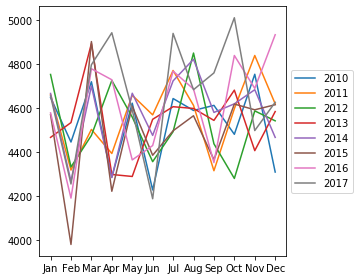

In [28]:
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()